In [1]:
# ==============================
# 🌸 Support Vector Machines - Iris Dataset
# ==============================

# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [2]:
# 2. Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


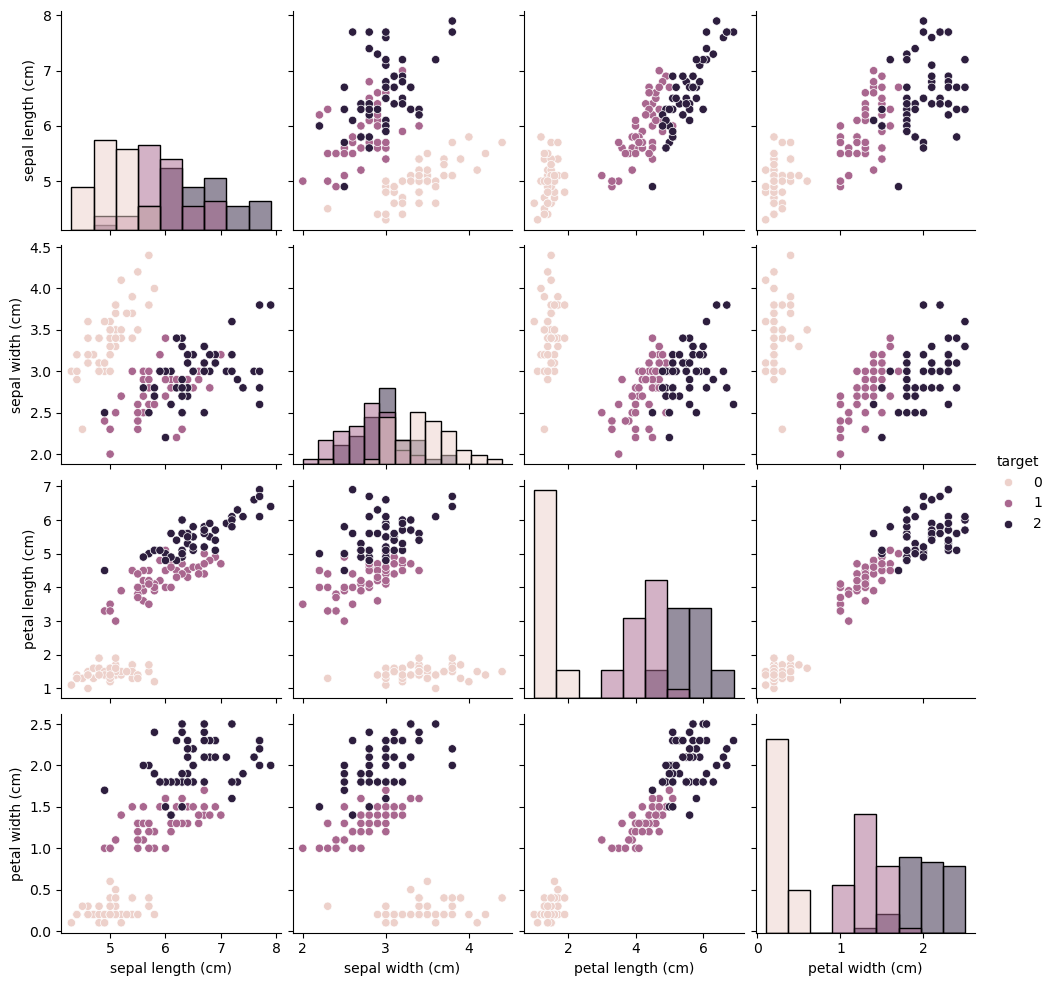

In [3]:
# 3. Data visualization
sns.pairplot(df, hue='target', diag_kind='hist')
plt.show()



In [13]:
# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)



In [14]:
# 5. Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [15]:
# 6. Train a linear SVM
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)



SVC(C=1, kernel='linear')

In [16]:
# 7. Predictions
y_pred = svm_linear.predict(X_test)



In [17]:
# 8. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.95
[[20  0  0]
 [ 0 19  1]
 [ 0  2 18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.90      0.95      0.93        20
           2       0.95      0.90      0.92        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



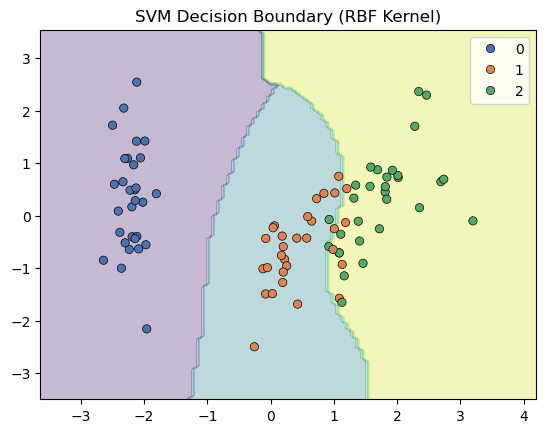

In [18]:
# 9. Visualization (2D projection)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
model = SVC(kernel='rbf', gamma=0.5, C=1)
model.fit(X_pca, y_train)

# Decision boundary
xx, yy = np.meshgrid(np.linspace(X_pca[:, 0].min()-1, X_pca[:, 0].max()+1, 100),
                     np.linspace(X_pca[:, 1].min()-1, X_pca[:, 1].max()+1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_train, palette='deep', edgecolor='k')
plt.title("SVM Decision Boundary (RBF Kernel)")
plt.show()



In [11]:
# 10. Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

print("Best parameters found: ", grid.best_params_)
best_model = grid.best_estimator_

# Final evaluation
y_pred_best = best_model.predict(X_test)
print("Final accuracy:", accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Final accuracy: 0.9111111111111111
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

